In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/shiyudie/Desktop/PMA/goodreads.csv', encoding='utf-8')

/var/folders/r9/t445bfh14q7d95jv3f45xzhw0000gn/T/ipykernel_87304/303950954.py:6: DtypeWarning: Columns (0,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/shiyudie/Desktop/PMA/goodreads.csv', encoding='utf-8')


In [100]:
df.head()

,id,title,link,series,cover_link,author,author_link,rating_count,review_count,average_rating,...,asin,settings,characters,awards,amazon_redirect_link,worldcat_redirect_link,recommended_books,books_in_series,description,Target
0,630104.0,Inner Circle,https://www.goodreads.com//book/show/630104.In...,(Private #5),https://i.gr-assets.com/images/S/compressed.ph...,"Kate Brian, Julian Peploe",https://www.goodreads.com/author/show/94091.Ka...,7597.0,196.0,4.03,...,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"726458, 726458, 1537534, 3047848, 1651302, 304...","381489, 381501, 352428, 630103, 1783281, 17832...",Reed Brennan arrived at Easton Academy expecti...,0.0
1,9487.0,A Time to Embrace,https://www.goodreads.com//book/show/9487.A_Ti...,(Timeless Love #2),https://i.gr-assets.com/images/S/compressed.ph...,Karen Kingsbury,https://www.goodreads.com/author/show/3159984....,4179.0,177.0,4.35,...,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"127352, 127352, 40642197, 127353, 127354, 3891...",115036,Ideje az √É¬É√Ç¬∂lel√É¬É√Ç¬©snek T√É¬É√Ç¬∂rt√É...,0.0
2,6050894.0,Take Two,https://www.goodreads.com//book/show/6050894-t...,(Above the Line #2),https://i.gr-assets.com/images/S/compressed.ph...,Karen Kingsbury,https://www.goodreads.com/author/show/3159984....,6288.0,218.0,4.23,...,NaN,"Bloomington, Indiana(United States)",NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"706250, 706250, 666481, 11942636, 706241, 1273...","4010795, 40792877, 7306261",Filmmakers Chase Ryan and Keith Ellison have c...,0.0
3,39030.0,Reliquary,https://www.goodreads.com//book/show/39030.Rel...,(Pendergast #2),https://i.gr-assets.com/images/S/compressed.ph...,"Douglas Preston, Lincoln Child",https://www.goodreads.com/author/show/12577.Do...,38382.0,1424.0,4.01,...,NaN,"New York State(United States) New York City, N...","Aloysius X.L. Pendergast, Margo Green, William...",NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"39026, 39026, 11007668, 3986318, 51887330, 194...","67035, 39031, 39033, 136637, 136638, 30068, 39...",NaN,0.0
4,998.0,The Millionaire Next Door: The Surprising Secr...,https://www.goodreads.com//book/show/998.The_M...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,"Thomas J. Stanley, William D. Danko",https://www.goodreads.com/author/show/659.Thom...,72168.0,3217.0,4.04,...,NaN,NaN,NaN,Independent Publisher Book Award (IPPY) Nomine...,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"1052, 1052, 763362, 69571, 78427, 30186948, 10...",NaN,The incredible national bestseller that is cha...,1.0


### Size of the orginal dataset

In [101]:
df.shape

(52222, 32)

### Drop obvious irrelevant features

In [102]:
df = df.drop(df[['link','cover_link','author','cover_link','author_link','original_title','title',
                 'isbn','isbn13','amazon_redirect_link','worldcat_redirect_link',
                 'description','characters','asin','awards','settings','books_in_series']], axis = 1)

In [103]:
df.dtypes

id                     object
series                 object
rating_count          float64
review_count          float64
average_rating        float64
five_star_ratings     float64
four_star_ratings     float64
three_star_ratings    float64
two_star_ratings      float64
one_star_ratings      float64
number_of_pages       float64
date_published         object
publisher              object
genre_and_votes        object
recommended_books      object
Target                float64
dtype: object

### Check and Handle missing value

As some books are not series, so they generate large numbers of missing values in “Series”. We treat “Series” as categorical variable, so we handle the missing value by filling with “0”.  Except for “Series”, missing values in other columns are not considerable compared with the whole dataset, so we drop them directly.

In [104]:
# finding the number of missing values in df:
df.isnull().sum()

id                       15
series                28903
rating_count             23
review_count             23
average_rating           23
five_star_ratings        23
four_star_ratings        23
three_star_ratings       23
two_star_ratings         23
one_star_ratings         23
number_of_pages        2353
date_published          883
publisher              3659
genre_and_votes        2863
recommended_books      4017
Target                   28
dtype: int64

In [105]:
# Delete rows that have missing value in some features directly
df.dropna(subset=['id','Target','rating_count','review_count','five_star_ratings','four_star_ratings','three_star_ratings',
                  'two_star_ratings','one_star_ratings','average_rating','date_published','publisher','genre_and_votes',
                  'recommended_books','number_of_pages'], inplace=True)

In [106]:
# Fill missing value in Series with "0"
df['series'] = df['series'].fillna(0)

In [107]:
# Check the number of nulls in df after handling the missing values:
df.isnull().sum()

id                    0
series                0
rating_count          0
review_count          0
average_rating        0
five_star_ratings     0
four_star_ratings     0
three_star_ratings    0
two_star_ratings      0
one_star_ratings      0
number_of_pages       0
date_published        0
publisher             0
genre_and_votes       0
recommended_books     0
Target                0
dtype: int64

In [108]:
df.shape

(43420, 16)

### Check and handle duplicated values

In [109]:
df.shape

(43420, 16)

In [110]:
### Check duplicated values in dataset
df.duplicated().value_counts()

False    43420
Name: count, dtype: int64

### Generate Feature 1: Series

Series”, which is used to identify if the book is in a series.

Series is a categorical variable, if that books is series, we record it as "1"; Otherwise, we record it as "0"

In [111]:
# If series != 0, it means book is series, we record it as "1"; Otherwise, we record it as "0"

df['series']= [1 if value != 0 else 0 for value in df['series']]

df.head()

,id,series,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,date_published,publisher,genre_and_votes,recommended_books,Target
0,630104.0,1,7597.0,196.0,4.03,3045.0,2323.0,1748.0,389.0,92.0,220.0,January 1st 2007,Simon Schuster Books for Young Readers,"Young Adult 161, Mystery 45, Romance 32","726458, 726458, 1537534, 3047848, 1651302, 304...",0.0
1,9487.0,1,4179.0,177.0,4.35,2255.0,1290.0,518.0,93.0,23.0,400.0,October 29th 2006,Thomas Nelson,"Christian Fiction 114, Christian 45, Fiction 3...","127352, 127352, 40642197, 127353, 127354, 3891...",0.0
2,6050894.0,1,6288.0,218.0,4.23,3000.0,2020.0,1041.0,183.0,44.0,320.0,January 1st 2009,Zondervan,"Christian Fiction 174, Christian 81, Fiction 58","706250, 706250, 666481, 11942636, 706241, 1273...",0.0
3,39030.0,1,38382.0,1424.0,4.01,12711.0,15407.0,8511.0,1429.0,324.0,464.0,1997,Tor Books,"Thriller 626, Mystery 493, Horror 432, Fiction...","39026, 39026, 11007668, 3986318, 51887330, 194...",0.0
4,998.0,0,72168.0,3217.0,4.04,27594.0,25219.0,14855.0,3414.0,1086.0,258.0,October 28th 1995,Gallery Books,"Economics-Finance 1162, Nonfiction 910, Busine...","1052, 1052, 763362, 69571, 78427, 30186948, 10...",1.0


### Generate feature 2&3 based on rating_counts & numbers of pages : "Rate_pages" and "Rate_count"

The second and third features we considered are "Rate_pages" and "Rate_count". These are weighted scores that conclude the effects of numbers of ratings and pages

In [112]:
df['Rate_pages'] = df['average_rating']*df['number_of_pages']

In [113]:
df['Rate_count'] = df['average_rating']*df['rating_count']

### Generate feature 4: Publishion_duration

We use current year minus published date to Calculate the duration of book

In [114]:
# As there are various types of date:
# Retain only samples where the last four characters are all numbers
df = df[df['date_published'].str[-4:].apply(lambda x: x.isdigit())]

# Retain only the last four characters of each samples as we only need to extract "year"
df['date_published'] = df['date_published'].astype(str).str[-4:]

In [115]:
df['date_published'] = df['date_published'].astype(int)

In [116]:
df['Publishion_duration'] = 2024 - df['date_published']

In [117]:
df = df.drop('date_published',axis = 1)

### Generate feature 5: count_recommended_books

Count the numbers of times it has been recommended by other books (recommended_books)

In [118]:
df['count'] = df['recommended_books'].str.count(',')
df['count_recommended_books'] = df['count']+1

In [119]:
df = df.drop(df[['count','recommended_books']],axis = 1)

In [120]:
df.dtypes

id                          object
series                       int64
rating_count               float64
review_count               float64
average_rating             float64
five_star_ratings          float64
four_star_ratings          float64
three_star_ratings         float64
two_star_ratings           float64
one_star_ratings           float64
number_of_pages            float64
publisher                   object
genre_and_votes             object
Target                     float64
Rate_pages                 float64
Rate_count                 float64
Publishion_duration          int64
count_recommended_books      int64
dtype: object

### Generate Target variables

To generate the target variable "whether a book has won an award", we will process the existing target variable. If the book has been nominated, we recorded it as “1”.

In [121]:
# If Target > 0, it recorded as award, otherwise, it record as not reward
df['Target']= [1 if value > 0 else 0 for value in df['Target']]

In [122]:
df.shape

(41069, 18)

### Use genre_and_votes to generate feature 6: Popular_genres

In [123]:
# Select books that have been nominated
df_count = df[df['Target']==1]
# Select “genre_and_votes" and "ID" of books that have been nominated
df_genre = df_count[['id','genre_and_votes']]
df_genre.head()

,id,genre_and_votes
4,998.0,"Economics-Finance 1162, Nonfiction 910, Busine..."
10,24876258.0,"Fantasy 2449, Science Fiction-Steampunk 889, F..."
13,7640261.0,"Nonfiction 1134, Science 560, History 426, Sex..."
15,176892.0,"Fantasy 1109, Fantasy-Dragons 132, Fiction 88,..."
16,138811.0,"History 244, Nonfiction 64, Cultural-Russia 47..."


In [124]:
import pandas as pd
import re   # Using re to extract part of "Str" we needed and unifying the types of genres
# Transform “Str” of genres in genre_and_votes into "list" and use comma to split
df_genre['genre_and_votes'] = df_genre['genre_and_votes'].apply(lambda x: x.split(', '))
# Use explode function split the 'genre_and_votes' list, as each book has various genres
#reference of using explode():https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html
exploded_df = df_genre.explode('genre_and_votes')

/var/folders/r9/t445bfh14q7d95jv3f45xzhw0000gn/T/ipykernel_87304/3150791925.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre['genre_and_votes'] = df_genre['genre_and_votes'].apply(lambda x: x.split(', '))


In [125]:
# We found genres have various subcategories,some subcategories have numeric value: “321“, some have sign ”-“
# We only want to keep the primary genres, so we extact part of str
# (r'^([^\d-]+)') is regular expression used to extract str before the first sign "-" or the first "numeric value"
# "\d" represents numeric value and "-" represents sign: - ; ^ means not equal

# Use extract function to get a correct series:
exploded_df['genre_and_votes'] = exploded_df['genre_and_votes'].str.extract(r'^([^\d-]+)')
# Find frequency of genres that have been nominated
element_counts = exploded_df['genre_and_votes'].value_counts().reset_index()

In [126]:
exploded_df.head()

,id,genre_and_votes
4,998.0,Economics
4,998.0,Nonfiction
4,998.0,Business
4,998.0,Finance
4,998.0,Self Help


In [127]:
# Compare the element_counts with the median of it to find genres that authors prefer
print(element_counts['count'].median())
# Select genres that larger than median:
df_popular = element_counts[element_counts['count'] > element_counts['count'].median()]
df_popular.head()

23.0


,genre_and_votes,count
0,Fiction,6791
1,Fantasy,2712
2,Young Adult,2638
3,Fantasy,2314
4,Historical,2028


In [128]:
# Select "genre_and_votes" columns
df_total_genre = df[['id','genre_and_votes']]
df_total_genre['genre_and_votes'] = df_total_genre['genre_and_votes'].apply(lambda x: x.split(', '))
total_exploded_df = df_total_genre.explode('genre_and_votes')
total_exploded_df['genre_and_votes'] = total_exploded_df['genre_and_votes'].str.extract(r'^([^\d-]+)')

/var/folders/r9/t445bfh14q7d95jv3f45xzhw0000gn/T/ipykernel_87304/3288947868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_genre['genre_and_votes'] = df_total_genre['genre_and_votes'].apply(lambda x: x.split(', '))


In [129]:
# Create a set to put all popular_genres
popular_genres_set = set(df_popular['genre_and_votes'])

# Check if "genre_and_votes" are in "Popular_genres"
total_exploded_df['Popular_genres'] = total_exploded_df['genre_and_votes'].apply(lambda x: 1 if x in popular_genres_set else 0)
total_exploded_df.head()

,id,genre_and_votes,Popular_genres
0,630104.0,Young Adult,1
0,630104.0,Mystery,1
0,630104.0,Romance,1
1,9487.0,Christian Fiction,1
1,9487.0,Christian,1


In [130]:
# Aggregate Popular_genres by using id
df_type = total_exploded_df.groupby('id')['Popular_genres'].sum().reset_index()
df_type.head()

,id,Popular_genres
0,1.0,10
1,2.0,3
2,3.0,10
3,5.0,10
4,6.0,3


In [131]:
df = df.merge(df_type, on='id', how='left')
df = df.drop(['genre_and_votes'], axis=1)
df.head()

,id,series,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,publisher,Target,Rate_pages,Rate_count,Publishion_duration,count_recommended_books,Popular_genres
0,630104.0,1,7597.0,196.0,4.03,3045.0,2323.0,1748.0,389.0,92.0,220.0,Simon Schuster Books for Young Readers,0,886.60,30615.91,17,19,3
1,9487.0,1,4179.0,177.0,4.35,2255.0,1290.0,518.0,93.0,23.0,400.0,Thomas Nelson,0,1740.00,18178.65,18,19,4
2,6050894.0,1,6288.0,218.0,4.23,3000.0,2020.0,1041.0,183.0,44.0,320.0,Zondervan,0,1353.60,26598.24,15,19,3
3,39030.0,1,38382.0,1424.0,4.01,12711.0,15407.0,8511.0,1429.0,324.0,464.0,Tor Books,0,1860.64,153911.82,27,19,4
4,998.0,0,72168.0,3217.0,4.04,27594.0,25219.0,14855.0,3414.0,1086.0,258.0,Gallery Books,1,1042.32,291558.72,29,19,8


### Feature 4: Popular_publisher

In [132]:
# df_count is target = 1
# Select "genre_and_votes" columns
df_publisher = df_count[['id','publisher']]

# Find frequency of genres
publisher_counts = df_publisher['publisher'].value_counts().reset_index()

In [133]:
# Select publisher that larger than median:
print(publisher_counts['count'].median())
Popular_publisher = publisher_counts [publisher_counts ['count'] > publisher_counts['count'].median()]
Popular_publisher.head()

1.0


,publisher,count
0,Vintage,227
1,Penguin Books,145
2,HarperCollins,144
3,Ballantine Books,117
4,"Little, Brown Books for Young Readers",105


In [134]:
# Creat a set to put all 'publisher'
popular = set(Popular_publisher['publisher'])

# Check publisher in the whole dataset
df['Popular_publisher'] = df['publisher'].apply(lambda x: 1 if x in popular else 0)
df = df.drop('publisher',axis = 1)

In [135]:
df.shape

(41069, 18)

In [136]:
df.dtypes

id                          object
series                       int64
rating_count               float64
review_count               float64
average_rating             float64
five_star_ratings          float64
four_star_ratings          float64
three_star_ratings         float64
two_star_ratings           float64
one_star_ratings           float64
number_of_pages            float64
Target                       int64
Rate_pages                 float64
Rate_count                 float64
Publishion_duration          int64
count_recommended_books      int64
Popular_genres               int64
Popular_publisher            int64
dtype: object

### Initial analysis of data: Use visual charts

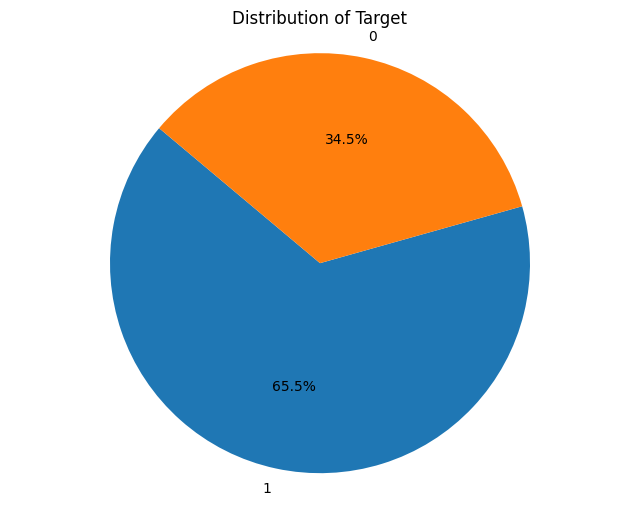

In [137]:
Target_counts = df['Popular_publisher'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(Target_counts, labels=Target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

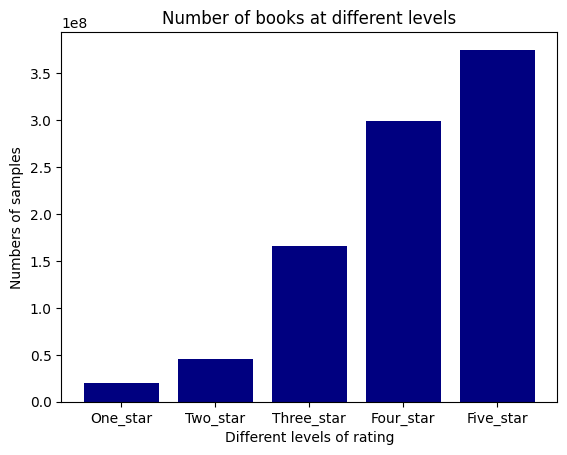

In [138]:
import matplotlib.pyplot as plt

# Calculate the number of each star rating in the dataset
categories = ['One_star', 'Two_star', 'Three_star', 'Four_star', 'Five_star']
sum_values = [df['one_star_ratings'].sum(),df['two_star_ratings'].sum() , df['three_star_ratings'].sum(),
              df['four_star_ratings'].sum(), df['five_star_ratings'].sum()]

# Draw bar chart
plt.bar(categories, sum_values, color='navy')

# Label and Title
plt.xlabel('Different levels of rating')
plt.ylabel('Numbers of samples')
plt.title('Number of books at different levels')

plt.show()

### Relation among review_count, rating_count and average rating with Target

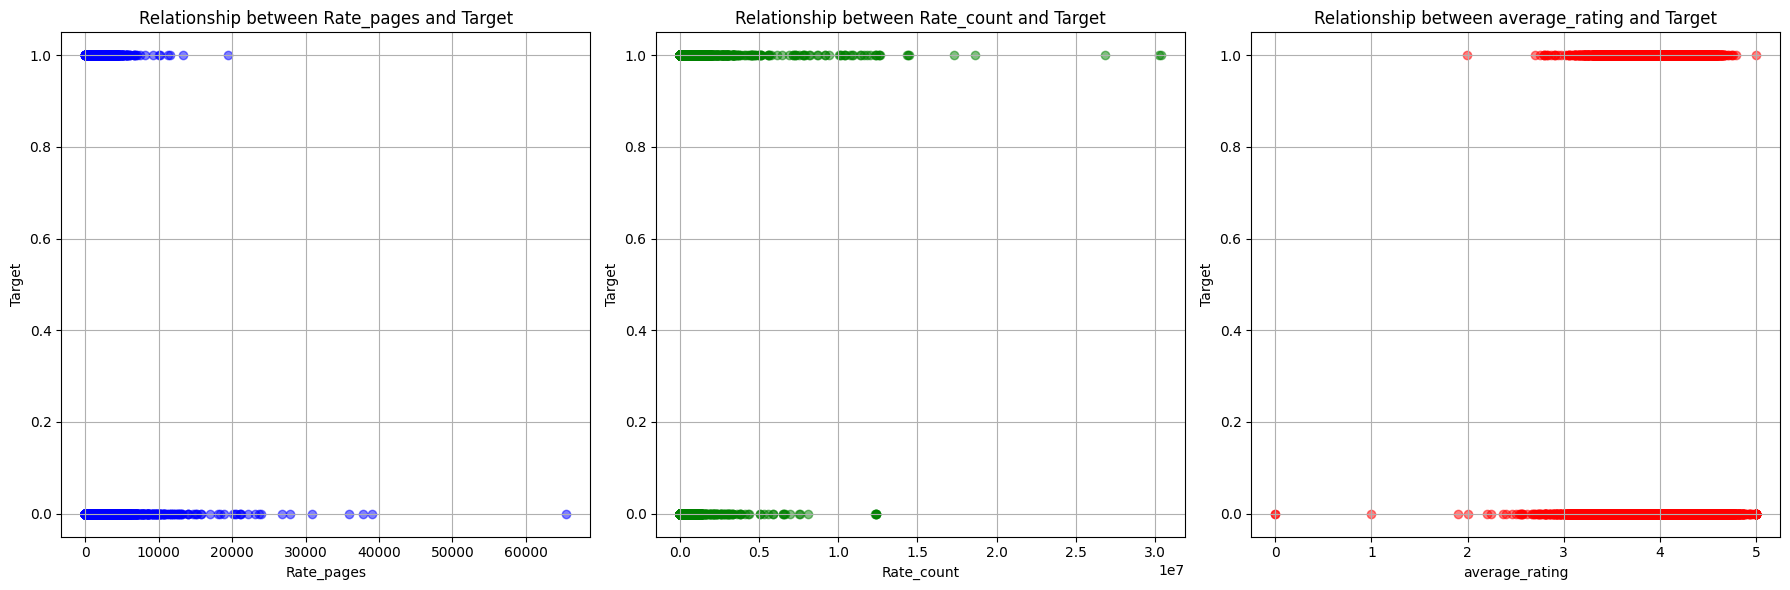

In [139]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

# The first scatter chart: Rate_pages
plt.subplot(1, 3, 1)
plt.scatter(df['Rate_pages'], df['Target'], alpha=0.5, color='b')
plt.title('Relationship between Rate_pages and Target')
plt.xlabel('Rate_pages')
plt.ylabel('Target')
plt.grid(True)

# The second scatter chart: Rate_count
plt.subplot(1, 3, 2)
plt.scatter(df['Rate_count'], df['Target'], alpha=0.5, color='g')
plt.title('Relationship between Rate_count and Target')
plt.xlabel('Rate_count')
plt.ylabel('Target')
plt.grid(True)

# The third scatter chart: average_rating
plt.subplot(1, 3, 3)
plt.scatter(df['average_rating'], df['Target'], alpha=0.5, color='r')
plt.title('Relationship between average_rating and Target')
plt.xlabel('average_rating')
plt.ylabel('Target')
plt.grid(True)

plt.tight_layout()
plt.show()


### Descriptive analysis

In [140]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
series,41069.0,0.478755,0.499555,0.0,0.00,0.00,1.00,1.00
rating_count,41069.0,22020.376440,127128.444894,0.0,787.00,3318.00,11605.00,6801077.00
review_count,41069.0,1187.744016,4403.036715,0.0,62.00,230.00,780.00,169511.00
average_rating,41069.0,3.995182,0.291512,0.0,3.81,4.01,4.19,5.00
five_star_ratings,41069.0,9135.579732,64794.568785,0.0,268.00,1169.00,4183.00,4414877.00
four_star_ratings,41069.0,7273.415472,37590.163577,0.0,258.00,1118.00,4004.00,1868421.00
three_star_ratings,41069.0,4032.718717,19778.723159,0.0,152.00,667.00,2323.00,980183.00
two_star_ratings,41069.0,1094.305413,6429.364353,0.0,37.00,161.00,559.00,529060.00
one_star_ratings,41069.0,484.357106,4236.352231,0.0,12.00,52.00,190.00,537793.00
number_of_pages,41069.0,339.007232,247.585137,0.0,224.00,314.00,400.00,14777.00


### Correlation analysis

In [141]:
# Calculate Correlation efficients among specific types of features
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Use 'Target' to check Correlation as it is our target value
Target_correlation = correlation_matrix['Target'].round(1)
print(Target_correlation)

series                    -0.1
rating_count               0.1
review_count               0.3
average_rating            -0.0
five_star_ratings          0.1
four_star_ratings          0.2
three_star_ratings         0.2
two_star_ratings           0.1
one_star_ratings           0.1
number_of_pages            0.0
Target                     1.0
Rate_pages                 0.0
Rate_count                 0.1
Publishion_duration       -0.1
count_recommended_books    0.1
Popular_genres             0.2
Popular_publisher          0.2
Name: Target, dtype: float64


In [142]:
# Keep feature we selected
df = df.loc[:, ['id','review_count','Publishion_duration','count_recommended_books','Popular_publisher','series','Popular_genres',
                'rating_count','five_star_ratings','four_star_ratings','three_star_ratings','two_star_ratings','one_star_ratings',
                'Rate_count','Target']]

df.head()

,id,review_count,Publishion_duration,count_recommended_books,Popular_publisher,series,Popular_genres,rating_count,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,Rate_count,Target
0,630104.0,196.0,17,19,1,1,3,7597.0,3045.0,2323.0,1748.0,389.0,92.0,30615.91,0
1,9487.0,177.0,18,19,1,1,4,4179.0,2255.0,1290.0,518.0,93.0,23.0,18178.65,0
2,6050894.0,218.0,15,19,1,1,3,6288.0,3000.0,2020.0,1041.0,183.0,44.0,26598.24,0
3,39030.0,1424.0,27,19,1,1,4,38382.0,12711.0,15407.0,8511.0,1429.0,324.0,153911.82,0
4,998.0,3217.0,29,19,1,0,8,72168.0,27594.0,25219.0,14855.0,3414.0,1086.0,291558.72,1


In [143]:
df.shape

(41069, 15)

In [144]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

scaler = RobustScaler()

columns_to_scale = df.select_dtypes(include=['float64']).columns

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [145]:
df.shape

(41069, 15)

# Split the data into train set and test set
After selecting id, Target, and the other 13 features, we get a new data frame that has 41069 books and 15 columns. Then, we split the data and used 80% of the data to train, and 20% of the data to test.

In [146]:
X = df.iloc[:,1:14]
Y= df.iloc[:,-1]

In [147]:
# split data into training and test
from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(32855, 13)
(8214, 13)
(32855,)
(8214,)


In [148]:
# Check how many categories in the review_class:
Categories_ratings = Y.unique()

print("Categories that rating have：", Categories_ratings)

Categories that rating have： [0 1]


In [149]:
from sklearn.model_selection import train_test_split
from collections import Counter

# Check Distribution of 1 and 0 in Y （target value) to make sure our dataset is balanced:

print("Original Distribution:", Counter(Y_train))

Original Distribution: Counter({0: 25012, 1: 7843})


### Balance the data

In [150]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
sm = SMOTE()
# Fit x_train and Y_train
resampled_train_x, resampled_train_y = sm.fit_resample(X_train, Y_train)

# Print distribution after balance
print("Distribution of Y after balance :", Counter(resampled_train_y))

Distribution of Y after balance : Counter({0: 25012, 1: 25012})


### Predict “Target”

In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [152]:
from sklearn.model_selection import GridSearchCV

In [155]:
rf_classifier = RandomForestClassifier()
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

# Predictions in trained dataset
rf_classifier.fit(resampled_train_x, resampled_train_y)

# Predictions on test dataset
Y_pred = rf_classifier.predict(X_test)

Y_pred_train = rf_classifier.predict(resampled_train_x)

In [156]:
#  Use related indicators to evaluate testing efficiency:

from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)
precision = precision_score(Y_test, Y_pred)
print("Precision:", precision)
recall = recall_score(Y_test, Y_pred)
print("Recall:", recall)
F1_score = 2 * (precision * recall) / (precision + recall)
print("F1_score:", F1_score)

Accuracy: 0.7574872169466764
Precision: 0.48085631947303414
Recall: 0.6150605581885202
F1_score: 0.5397412199630314


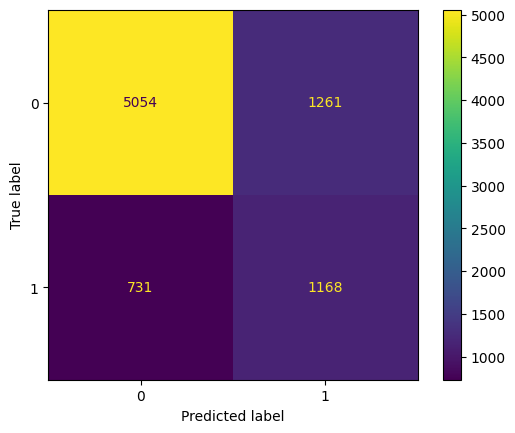

In [157]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# build a confusion matrix
cm = confusion_matrix(Y_test, Y_pred, labels=rf_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=rf_classifier.classes_)

disp.plot()
plt.show()

In [ ]:
import pandas as pd

# 获取特征重要性
importances = forest.feature_importances_

# 创建包含特征名称和重要性的DataFrame
feature_importances = df.DataFrame({'Feature': feature_names, 'Importance': importances})

# 按重要性降序排列
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# 输出排序后的特征重要性
print(feature_importances)

In [154]:
# Define Random forest model
rf = RandomForestClassifier()

# Set initial parameters
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # 树的数量
    'max_depth': [None, 10, 20, 30],  # 最大深度
    'min_samples_split': [2, 5, 10],  # 分割内部节点所需的最小样本数
    'min_samples_leaf': [1, 2, 4],  # 叶节点所需的最小样本数
    'bootstrap': [True, False]  # 是否使用bootstrap样本
}

# Set GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# Train the model
grid_search.fit(resampled_train_x, resampled_train_y)
# Best parameters
print("Best parameters：", grid_search.best_params_)
# Best scores
print("Best scores：", grid_search.best_score_)

# Use the best model we set
best_model = grid_search.best_estimator_
# Predict Y by using test set
Y_pred = best_model.predict(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Using relevant indicators to evaluate
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)
precision = precision_score(Y_test, Y_pred)
print("Precision:", precision)
recall = recall_score(Y_test, Y_pred)
print("Recall:", recall)
F1_score = 2 * (precision * recall) / (precision + recall)
print("F1_score:", F1_score)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   3.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   3.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   3.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   3.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   3.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   2.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   2.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   2.6s
[CV] END bootstrap=True, max_depth=None, min_samples_lea

KeyboardInterrupt: 

In [ ]:
# Best parameters
print("Best parameters：", grid_search.best_params_)
# Best scores
print("Best scores：", grid_search.best_score_)

Best parameters： {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Best scores： 0.8124230749722565


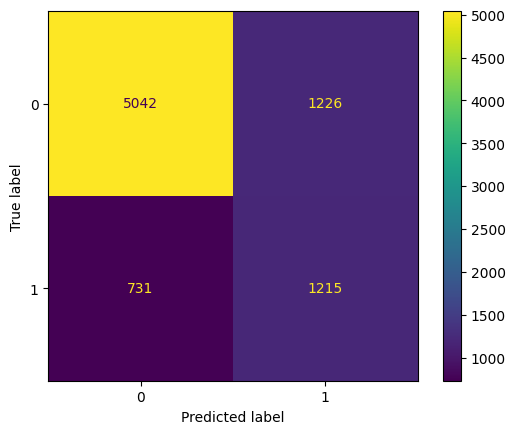

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# build a confusion matrix
cm = confusion_matrix(Y_test, Y_pred, labels=grid_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=grid_search.classes_)

disp.plot()
plt.show()

In [ ]:
import pandas as pd

# 获取特征重要性
importances = forest.feature_importances_

# 创建包含特征名称和重要性的DataFrame
feature_importances = pd.DataFrame({'Feature': range(X.shape[1]), 'Importance': importances})

# 将特征名称替换为实际特征名称
feature_importances['Feature'] = [f"feature {i}" for i in feature_importances['Feature']]

# 按重要性降序排列
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# 输出排序后的特征重要性
print(feature_importances)

### Logistic

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Use Gridsearch to find parameters:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Define Logistic Regression model
lr = LogisticRegression()

# Set initial parameters for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],  # Optimization algorithms
    'penalty': ['l1', 'l2']  # Norm used in the penalization
}

# Set GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Train the model
grid_search.fit(resampled_train_x, resampled_train_y)

# Best parameters
print("Best parameters：", grid_search.best_params_)

# Best scores
print("Best scores：", grid_search.best_score_)

# Use the best model
best_model = grid_search.best_estimator_

# Predict Y using test set
y_pred_Logistics = best_model.predict(X_test)

# Evaluate the predictions
accuracy = accuracy_score(Y_test, y_pred_Logistics)
print("Accuracy:", accuracy)
precision = precision_score(Y_test, y_pred_Logistics)
print("Precision:", precision)
recall = recall_score(Y_test, y_pred_Logistics)
print("Recall:", recall)
F1_score = 2 * (precision * recall) / (precision + recall)
print("F1_score:", F1_score)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   1.7s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   3.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   3.1s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   3.3s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   3.3s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   3.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   3.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   4.1s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   4.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=0.01, penalty=l2, solver=saga; total time=   4.2s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   4.7s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   4.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   4.7s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   4.6s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   4.8s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   5.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=0.01, penalty=l2, solver=saga; total time=   3.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=0.01, penalty=l2, solver=saga; total time=   3.7s
[CV] END ....................C=0.01, penalty=l2, solver=saga; total time=   3.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=0.01, penalty=l2, solver=saga; total time=   3.7s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   3.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   3.7s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   5.8s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   4.6s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   4.5s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   3.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   4.6s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   4.5s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   4.5s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   3.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   4.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=   4.1s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   8.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=   4.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=   4.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=   4.2s
[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=   4.2s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=  10.3s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=  10.7s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=  10.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time=   4.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time=   4.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time=   4.8s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   3.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time=   4.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time=   4.8s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   2.6s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   3.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   9.0s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   5.1s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   4.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   9.8s
[CV] END .......................C=1, penalty=l2, solver=saga; total time=   4.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=  10.0s
[CV] END .......................C=1, penalty=l2, solver=saga; total time=   4.2s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=  10.1s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=  10.4s
[CV] END .......................C=1, penalty=l2, solver=saga; total time=   4.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l2, solver=saga; total time=   4.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l2, solver=saga; total time=   4.3s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   3.1s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   3.7s
[CV] END ......................C=10, penalty=l1, solver=saga; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   4.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=   5.1s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   4.4s
[CV] END ......................C=10, penalty=l1, solver=saga; total time=   5.1s
[CV] END ......................C=10, penalty=l1, solver=saga; total time=   5.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=   5.2s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   4.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l2, solver=saga; total time=   4.7s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=  10.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l2, solver=saga; total time=   4.8s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=  11.4s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=  10.9s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=  10.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l2, solver=saga; total time=   4.8s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   4.7s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   4.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=   5.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=   5.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   3.6s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   3.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=   5.1s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   4.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=   5.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   4.6s
[CV] END .....................C=100, penalty=l1, solver=saga; total time=   5.0s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   8.7s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   4.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END .................C=10, penalty=l1, solver=liblinear; total time=  15.6s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   4.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l2, solver=saga; total time=   4.0s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=  10.3s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=  10.1s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=  10.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l2, solver=saga; total time=   3.3s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   3.2s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=  11.4s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   3.0s
Best parameters： {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best scores： 0.7000481255442889
Accuracy: 0.7056245434623813
Precision: 0.42216358839050133
Recall: 0.65775950668037
F1_score: 0.5142627561269586


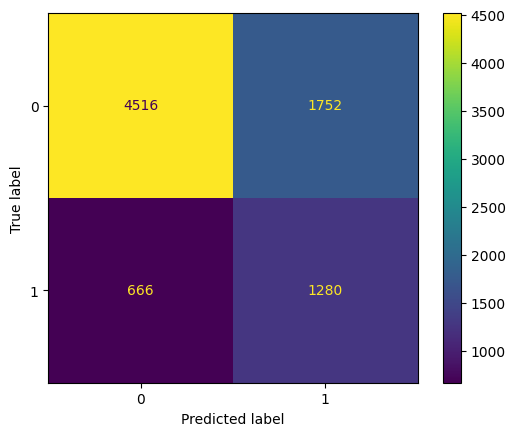

In [ ]:
# build a confusion matrix
cm = confusion_matrix(Y_test, y_pred_Logistics, labels=grid_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=grid_search.classes_)

disp.plot()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [ ]:
import time

import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.258 seconds
